In [1]:
from pyautoml import Clean, Preprocess, Feature, Model
import pandas as pd
%matplotlib inline

train_data = pd.read_csv('data/train.csv')

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

In [3]:
# clean.data_report(title='Titanic Summary', output_file='titanic_summary.html')

## Cleaning

In [4]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,575,712,712,NaN,712,NaN,NaN
mean,444.285,0.390449,2.30758,NaN,NaN,29.5603,0.515449,0.394663,NaN,31.3494,NaN,NaN
std,257.311,0.488194,0.836609,NaN,NaN,14.3706,1.08294,0.81313,NaN,44.6705,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,221.75,0,2,NaN,NaN,20.25,0,0,NaN,7.925,NaN,NaN
50%,446,0,3,NaN,NaN,28,0,0,NaN,14.4542,NaN,NaN
75%,665.25,1,3,NaN,NaN,39,1,0,NaN,30.6958,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,575,712,712,712,712,161,710
uniques,712,2,3,712,2,85,7,7,557,223,119,3


In [5]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,575,712,712,712,712,161,710
uniques,712,2,3,712,2,85,7,7,557,223,119,3
missing,0,0,0,0,0,137,0,0,0,0,551,2
missing_perc,0%,0%,0%,0%,0%,19.24%,0%,0%,0%,0%,77.39%,0.28%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        31.3494
std                         44.6705
variance                    1995.45
min                               0
max                         512.329
mode                             13
5%                          7.13419
25%                           7.925
50%                         14.4542
75%                         30.6958
95%                         110.883
iqr                         22.7708
kurtosis                    26.5386
skewness                    4.14758
sum                         22320.8
mad                         26.9302
cv                          1.42492
zeros_num                        14
zeros_perc                    1.97%
deviating_of_mean                13
deviating_of_mean_perc        1.83%
deviating_of_median              41
deviating_of_median_perc      5.76%
top_correlations                   
counts                          712
uniques                         223
missing                           0
missing_perc                

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


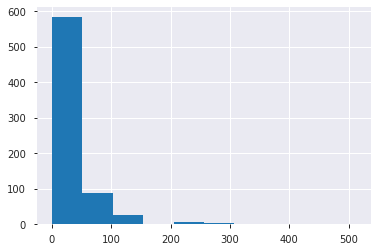

In [6]:
clean.describe_column('Fare')

31.34944311797753

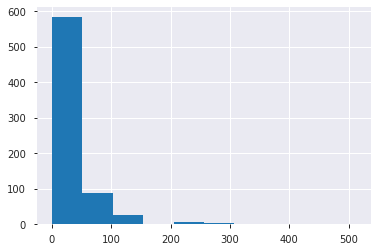

In [7]:
clean.describe_column('Fare')['mean']

In [8]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,551.000000,137.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.773876,0.192416,0.002809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,136.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.759777,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [10]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,NaN,15,S
1,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,B49,91.0792,C
2,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,NaN,7.75,Q
3,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,NaN,7.2292,C
4,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,NaN,26.55,C


In [11]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,551.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.773876,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,136.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.759777,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


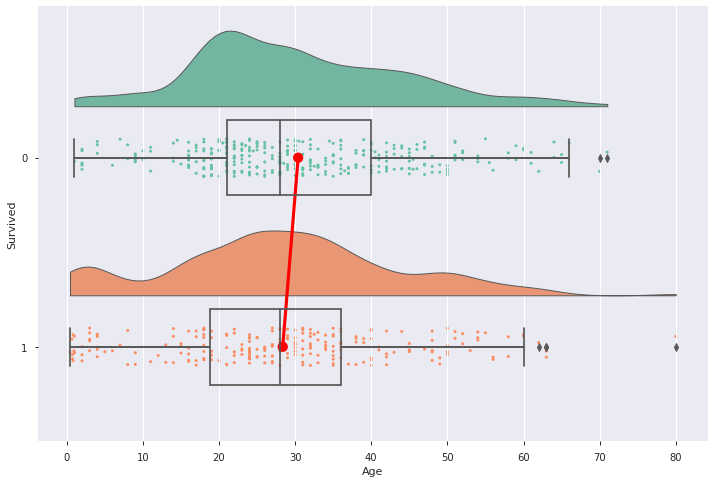

In [12]:
clean.visualize_raincloud('Age')

In [13]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,551.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.773876,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,136.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.759777,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,NaN,15,S
1,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,B49,91.0792,C
2,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,NaN,7.75,Q
3,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,NaN,7.2292,C
4,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,NaN,26.55,C


In [15]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,551.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.773876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,136.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.759777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,551.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.773876,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,136.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.759777,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean', xlabel='Age')

In [18]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15,S
1,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,C
2,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.75,Q
3,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C
4,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.55,C


In [19]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
counts,712,712,712,712,712,712,712,712,712,712,712
uniques,712,2,3,712,2,85,7,7,557,223,3
missing,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,categorical,categorical


In [20]:
clean.visualize_scatterplot('Age', 'Fare', fill_color='yellow')

## Feature Engineering

In [21]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [22]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,S,Mr
1,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,C,Mr
2,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q,Mr
3,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,Mr
4,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,C,Mr


In [23]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [24]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,S,Mr,0
1,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,C,Mr,1
2,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q,Mr,0
3,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,Mr,0
4,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,C,Mr,0


In [25]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,S,Mr,0,male
1,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,C,Mr,1,male
2,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q,Mr,0,male
3,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,Mr,0,male
4,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,C,Mr,0,male


In [26]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,S,Mr,0,male
1,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,C,Mr,1,male
2,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q,Mr,0,male
3,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,Mr,0,male
4,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,C,Mr,0,male


In [27]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex', 'PassengerId')

,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,0,2,47.0,15.0000,S,Mr,0,male
1,1,1,25.0,91.0792,C,Mr,1,male
2,1,3,29.0,7.7500,Q,Mr,0,male
3,0,3,23.5,7.2292,C,Mr,0,male
4,1,1,35.0,26.5500,C,Mr,0,male


In [28]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass', keep_col=False)

,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,0,47.0,15.0000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,25.0,91.0792,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,29.0,7.7500,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,23.5,7.2292,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,35.0,26.5500,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Modelling

In [29]:
model = Model(feature)

In [30]:
model.logistic_regression()

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
model.list_models()

######## QUEUED MODELS ########
No queued models.

######### RAN MODELS ##########
log_reg


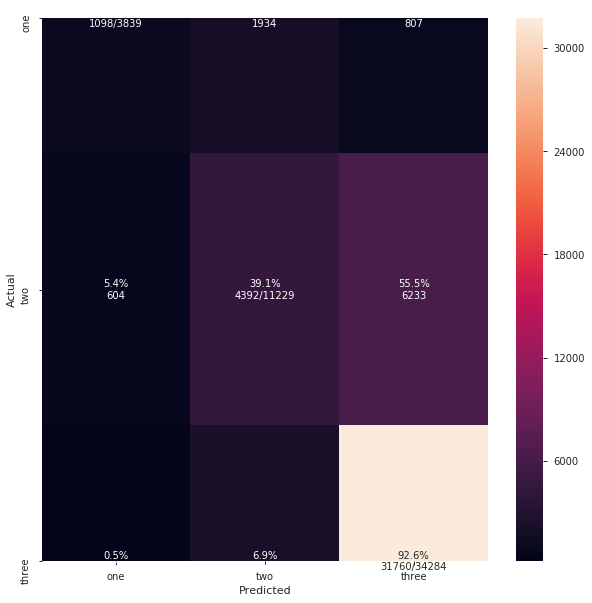

In [32]:
model.log_reg.cm_analysis()

In [38]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [53]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

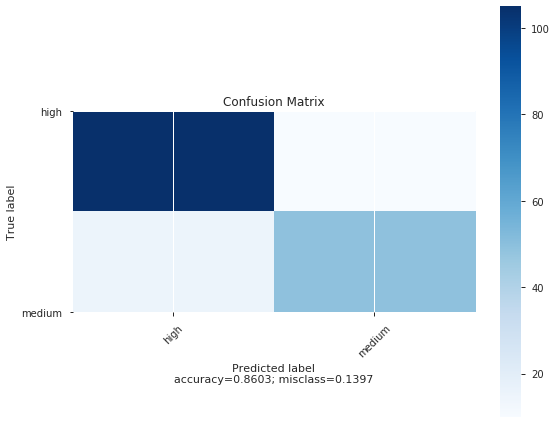

In [40]:
plot_confusion_matrix(cm = sklearn.metrics.confusion_matrix(model.log_reg.target_data, model.log_reg.prediction_data), 
                      normalize    = False,
                      target_names = ['high', 'medium'],
                      title        = "Confusion Matrix")

In [47]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    plt.grid(False)

In [55]:
df_cm = pd.DataFrame(
            sklearn.metrics.confusion_matrix(model.log_reg.target_data, model.log_reg.prediction_data), index=['1','2'], columns=['1','2'], 
        )

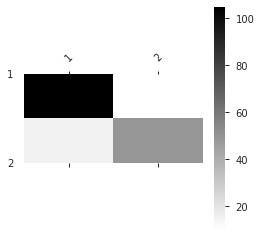

In [56]:
plot_confusion_matrix(df_cm)

In [50]:
%matplotlib inline

In [54]:
sns.set_style('whitegrid')